In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

!pip install wordcloud

categorias = pd.read_csv("categories.csv")
registros_inventario = pd.read_csv("inventory_logs.csv")
productos = pd.read_csv("products.csv")
opiniones = pd.read_csv("reviews.csv")
ordenes = pd.read_csv("orders.csv")
orden_productos = pd.read_csv("order_items.csv")
clientes = pd.read_csv("customers.csv")

## 1) Visualización de una variable continua comparada con una línea de tiempo

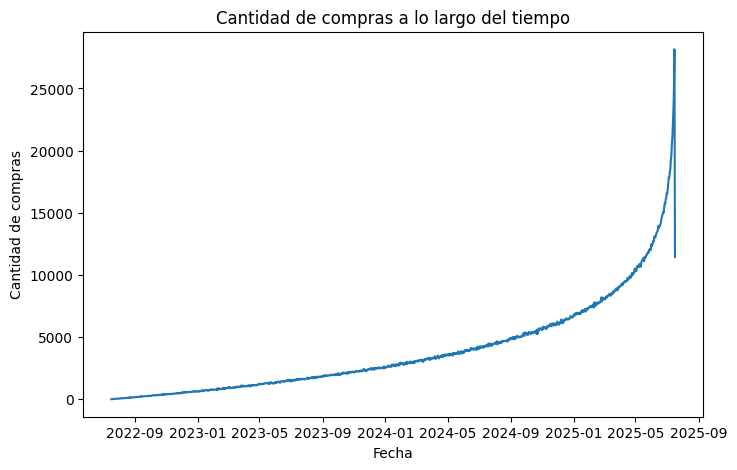

In [ ]:
filtro_creacion_nan = ordenes['created_at'].notna()
ordenes_filtradas = ordenes[filtro_creacion_nan]

filtro_creacion_undefined = ordenes_filtradas['created_at'].str.contains('undefined', case=False, na=False)
ordenes_filtradas = ordenes_filtradas[~filtro_creacion_undefined]

ordenes_filtradas['created_at'] = pd.to_datetime(ordenes_filtradas['created_at'], format='mixed')

ordenes_filtradas['fecha'] = ordenes_filtradas['created_at'].dt.date

ordenes_por_fecha = ordenes_filtradas.groupby('fecha').size().reset_index(name='cantidad_compras')

plt.figure(figsize=(8, 5))
sns.lineplot(data=ordenes_por_fecha, x='fecha', y='cantidad_compras')
plt.title('Cantidad de compras a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de compras')
plt.show()

## 2) Visualización de una variable discreta comparada con una variable continua

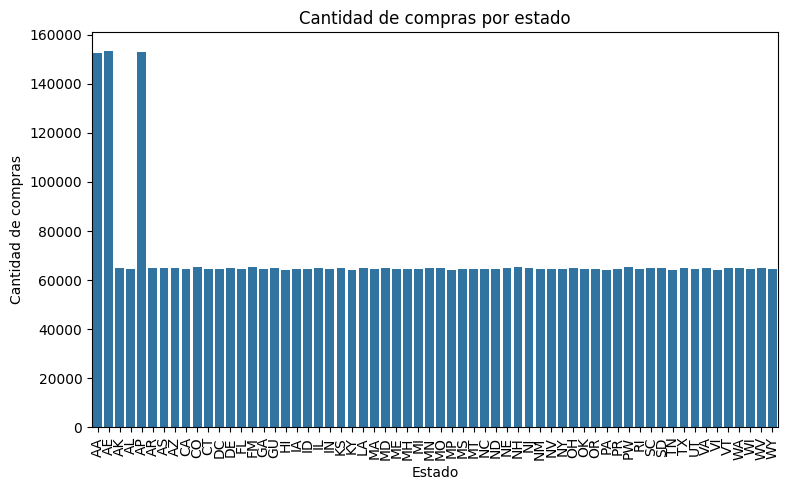

In [ ]:
import re

ordenes_copia = ordenes.copy()
ordenes_copia['billing_state'] = ordenes_copia['billing_address'].str.extract(r',?\s*([A-Za-z]{2})\s*\d{5}', flags=re.IGNORECASE)[0].str.upper()

filtro_estados = ordenes_copia['billing_state'].notnull()
ordenes_filtradas = ordenes_copia[filtro_estados]

compras_por_estado = ordenes_filtradas.groupby('billing_state').size().reset_index(name='cantidad_compras')

plt.figure(figsize=(8, 5))
sns.barplot(data=compras_por_estado, x='billing_state', y='cantidad_compras')
plt.title("Cantidad de compras por estado")
plt.xlabel("Estado")
plt.ylabel("Cantidad de compras")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3) Visualización de una variable discreta comparada con otra discreta

/tmp/ipython-input-1224018808.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordenes_filtradas['status'] = ordenes_filtradas['status'].str.lower().str.strip()
/tmp/ipython-input-1224018808.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordenes_filtradas['is_completed'] = ordenes_filtradas['status'] == 'completed'


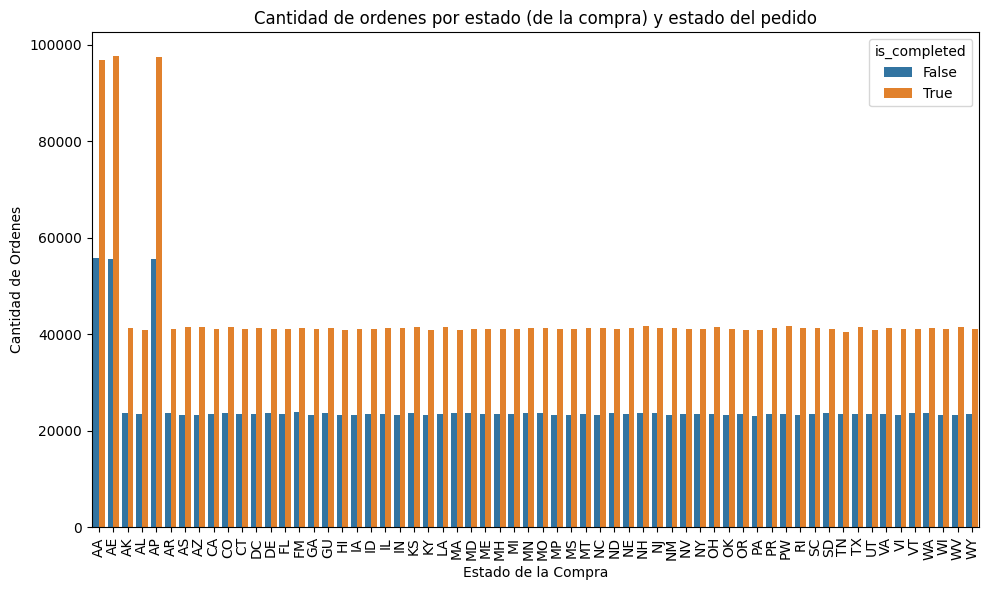

In [ ]:
import re

ordenes_copia = ordenes.copy()
ordenes_copia['billing_state'] = ordenes_copia['billing_address'].str.extract(r',?\s*([A-Za-z]{2})\s*\d{5}', flags=re.IGNORECASE)[0].str.upper()

filtro_estados = ordenes_copia['billing_state'].notnull()
ordenes_filtradas = ordenes_copia[filtro_estados]

ordenes_filtradas['status'] = ordenes_filtradas['status'].str.lower().str.strip()
ordenes_filtradas['is_completed'] = ordenes_filtradas['status'] == 'completed'

ordenes_por_estado_y_completado = ordenes_filtradas.groupby(['billing_state', 'is_completed']).size().reset_index(name='cantidad')

plt.figure(figsize=(10, 6))
plt.title('Cantidad de ordenes por estado (de la compra) y estado del pedido')
sns.barplot(data=ordenes_por_estado_y_completado, x='billing_state', y='cantidad', hue='is_completed')
plt.xlabel('Estado de la Compra')
plt.ylabel('Cantidad de Ordenes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 4) Visualización de una variable continua comparada con otra continua

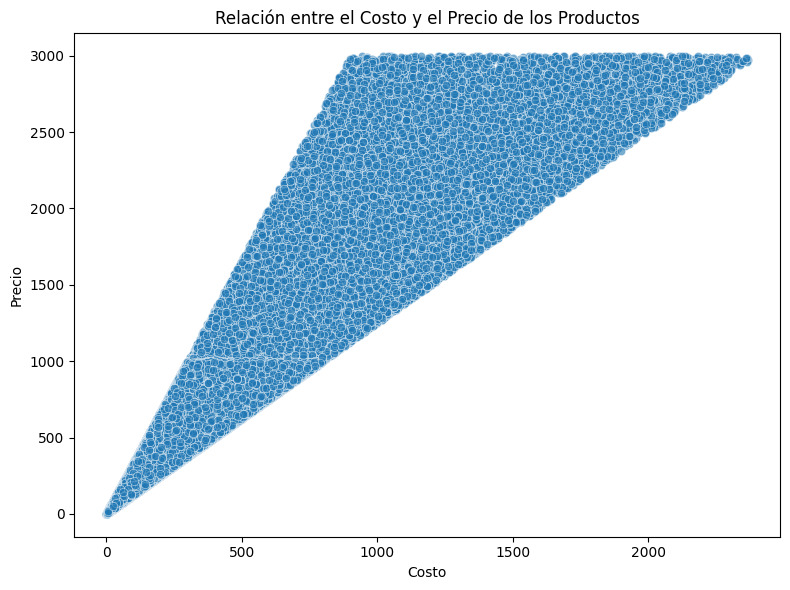

In [ ]:
productos_filtrados_precio_costo = productos.dropna(subset=['price', 'cost'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=productos_filtrados_precio_costo, x='cost', y='price', alpha=0.6)
plt.title('Relación entre el Costo y el Precio de los Productos')
plt.xlabel('Costo')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()

## 5) Heatmap

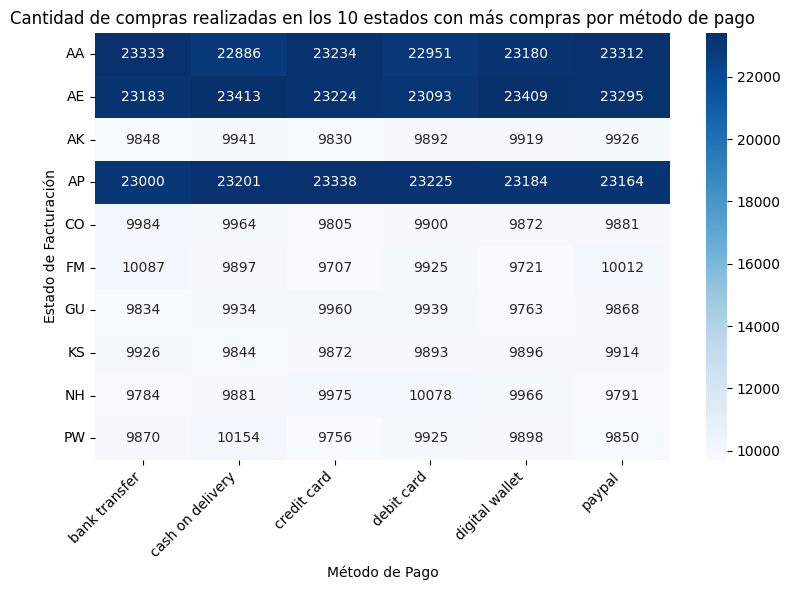

In [ ]:
import re

ordenes_copia = ordenes.copy()
ordenes_copia['billing_state'] = ordenes_copia['billing_address'].str.extract(r',?\s*([A-Za-z]{2})\s*\d{5}', flags=re.IGNORECASE)[0].str.upper()

filtro_estados = ordenes_copia['billing_state'].notnull()
ordenes_filtradas = ordenes_copia[filtro_estados]

filtro_pago_nan = ordenes_filtradas['payment_method'].notna()
ordenes_filtradas = ordenes_filtradas[filtro_pago_nan]

filtro_pago_undefined = ordenes_filtradas['payment_method'].str.contains('undefined', case=False, na=False)
ordenes_filtradas = ordenes_filtradas[~filtro_pago_undefined]

ordenes_filtradas['payment_method'] = ordenes_filtradas['payment_method'].str.lower().str.strip()

compras_por_estado = ordenes_filtradas.groupby('billing_state').size().reset_index(name='cantidad_compras')

estados_mas_compras = compras_por_estado.nlargest(10, 'cantidad_compras')

ordenes_top_estados = ordenes_filtradas[ordenes_filtradas['billing_state'].isin(estados_mas_compras['billing_state'])]

pivot = pd.pivot_table(ordenes_top_estados, values='order_id', index='billing_state', columns='payment_method', aggfunc='count', fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Blues')
plt.title('Cantidad de compras realizadas en los 10 estados con más compras por método de pago')
plt.xlabel('Método de Pago')
plt.ylabel('Estado de Facturación')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 6) Histograma

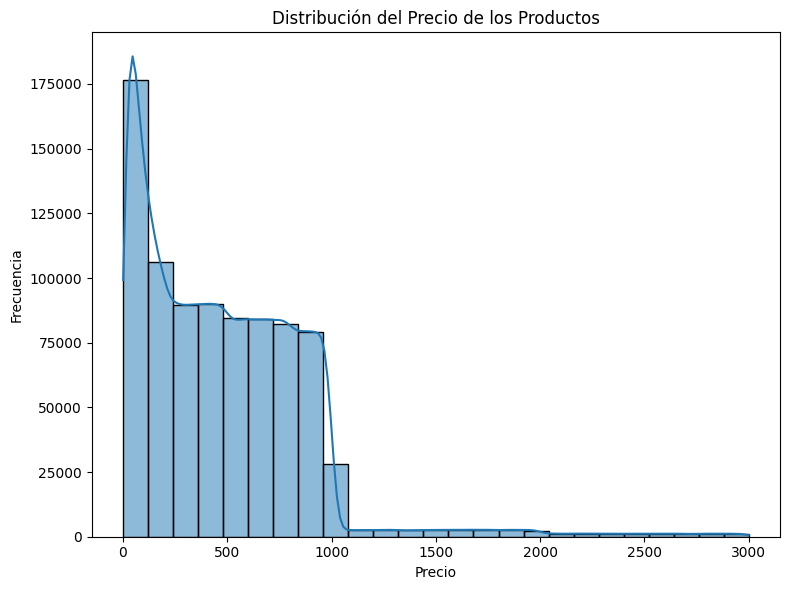

In [ ]:
filtro_precio_nan = productos['price'].notna()
productos_filtrados = productos[filtro_precio_nan]

plt.figure(figsize=(8, 6))
sns.histplot(data=productos_filtrados, x='price', bins=25, kde=True)
plt.title('Distribución del Precio de los Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## 6) Violinplot

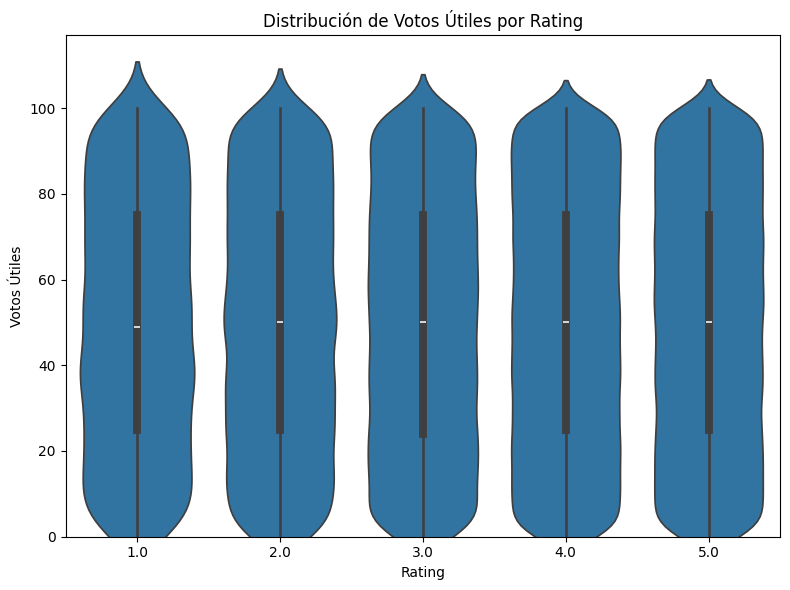

In [ ]:
filtro_opiniones_nan = opiniones.dropna(subset=['rating', 'helpful_votes'])

plt.figure(figsize=(8, 6))
sns.violinplot(data=filtro_opiniones_nan, x='rating', y='helpful_votes')
plt.title('Distribución de Votos Útiles por Rating')
plt.xlabel('Rating')
plt.ylabel('Votos Útiles')
plt.ylim(0, None)
plt.tight_layout()
plt.show()

## 7) Treemap

In [ ]:
import plotly.express as px

ordenes_copia = ordenes.copy()
ordenes_copia.loc[(ordenes_copia['payment_method'].str.lower() == 'undefined') | (ordenes_copia['payment_method'].isna()), 'payment_method'] = 'others'
ordenes_copia.loc[(ordenes_copia['currency'].str.lower() == 'undefined') | (ordenes_copia['currency'].isna()), 'currency'] = 'others'

ordenes_copia['payment_method'] = ordenes_copia['payment_method'].str.lower().str.strip()
ordenes_copia['currency'] = ordenes_copia['currency'].str.lower().str.strip()

compras_por_metodo_pago_y_moneda = ordenes_copia.groupby(['payment_method', 'currency']).size().reset_index(name='cantidad_compras')

fig = px.treemap(
    compras_por_metodo_pago_y_moneda,
    path=["payment_method", "currency"],
    values="cantidad_compras",
    color="cantidad_compras",
    color_continuous_scale="BrBG"
)

fig.update_layout(
    title_text='Distribución de monedas utilizadas por cada método de compra en las órdenes',
    width=800,
    height=800,
)
fig.show()

## 8) WordCloud

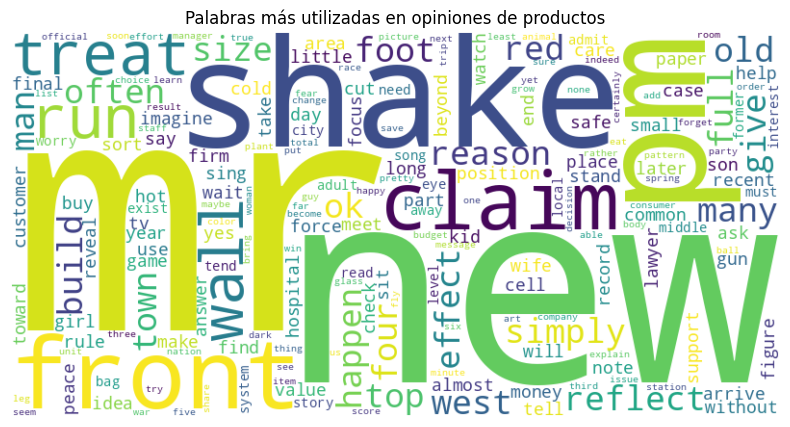

In [ ]:
from wordcloud import WordCloud

filtro_comentarios_nan = opiniones['comment'].notna()
comentarios_filtrados = opiniones[filtro_comentarios_nan]

filtro_comentarios_undefined = comentarios_filtrados['comment'].str.contains('undefined', case=False, na=False)
comentarios_filtrados = comentarios_filtrados[~filtro_comentarios_undefined].copy()

comentarios_filtrados['comment_limpio'] = comentarios_filtrados['comment'].str.replace('\n', ' ', regex=False).str.replace(',', ' ', regex=False).str.replace('.', ' ', regex=False).str.lower().fillna('')

texto_completo = " ".join(comentarios_filtrados['comment_limpio'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Palabras más utilizadas en opiniones de productos")
plt.axis("off")
plt.show()

## 9) Boxplot

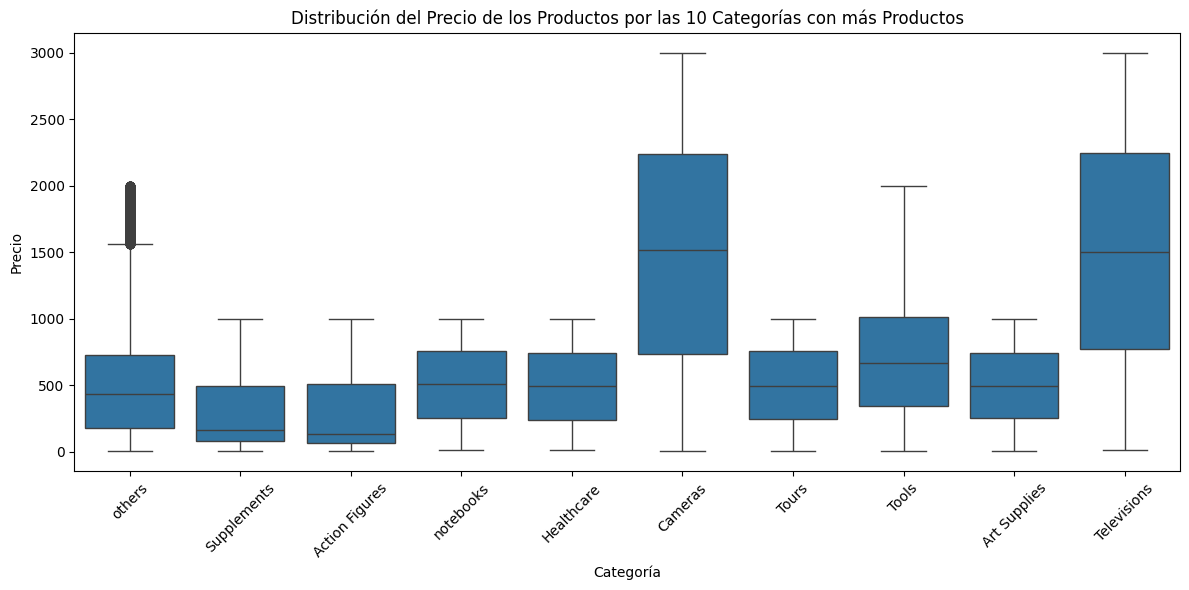

In [ ]:
productos_categorias = pd.merge(productos, categorias, left_on='category_id', right_on='category_id', how='inner')

productos_categorias.loc[(productos_categorias['category_name'].str.lower() == 'undefined') | (productos_categorias['category_name'].isna()), 'category_name'] = 'others'

productos_filtrados_precio = productos_categorias.dropna(subset=['price'])

top_categories = productos_filtrados_precio['category_name'].value_counts().nlargest(10).index.tolist()

productos_top_categorias = productos_filtrados_precio[productos_filtrados_precio['category_name'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=productos_top_categorias, x='category_name', y='price')
plt.title('Distribución del Precio de los Productos por las 10 Categorías con más Productos')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()